# Medical Data Visualizer

In this project, you will visualize and make calculations from medical examination data using matplotlib, seaborn, and pandas. The dataset values were collected during medical examinations.

Data description
The rows in the dataset represent patients and the columns represent information like body measurements, results from various blood tests, and lifestyle choices. You will use the dataset to explore the relationship between cardiac disease, body measurements, blood markers, and lifestyle choices.

File name: medical_examination.csv

Tasks
Create a chart similar to examples/Figure_1.png, where we show the counts of good and bad outcomes for the cholesterol, gluc, alco, active, and smoke variables for patients with cardio=1 and cardio=0 in different panels.

Use the data to complete the following tasks in medical_data_visualizer.py:

<ul>
<li>Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.</li>

<li>
Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.</li>

<li>Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). The dataset should be split by 'Cardio' so there is one chart for each cardio value. The chart should look like examples/Figure_1.png.</li>

<li>
Clean the data. Filter out the following patient segments that represent incorrect data:
        <ul>
<li>diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))</li>

<li>                                                                                                        
height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
</li>
            
<li>height is more than the 97.5th percentile</li>
<li>weight is less than the 2.5th percentile</li>
<li>weight is more than the 97.5th percentile</li>
            
</ul>
</li>
        
<li>Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap(). Mask the upper triangle. The chart should look like examples/Figure_2.png.
Any time a variable is set to None, make sure to set it to the correct code.</li>
<ul>


In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# read data
df = pd.read_csv('medical_examination.csv')
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [66]:
# create column overweight
# convert cm to m with divide cm on 100
# then we want to calculate Body MASS Index
# if the value greater than 25 then 1 else 0

def BMI(weight, height):
    
    h = height / 100
    bmi = weight / (h ** 2)
    
    return bmi


bmi = BMI(df['weight'], df['height'])

# you can use applu method
# df['overweight'] = bmi.apply(lambda x: x > 25, 1, 0)

# you can use np.where method
df['overweight'] = np.where(bmi > 25, 1, 0)
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1


In [67]:
# normlize the data 
df['gluc'] = np.where(df.gluc == 1, 0, 1)
df['cholesterol'] = np.where(df.cholesterol == 1, 0, 1)

df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [68]:
# melt method that will make all columns in one column

melt_data = pd.melt(df, id_vars=['cardio'], value_vars=['alco', 'cholesterol', 'gluc', 'active', 'overweight', 'smoke'])
melt_data

,cardio,variable,value
0,0,alco,0
1,1,alco,0
2,1,alco,0
3,1,alco,0
4,0,alco,0
...,...,...,...
419995,0,smoke,1
419996,1,smoke,0
419997,1,smoke,0
419998,1,smoke,0


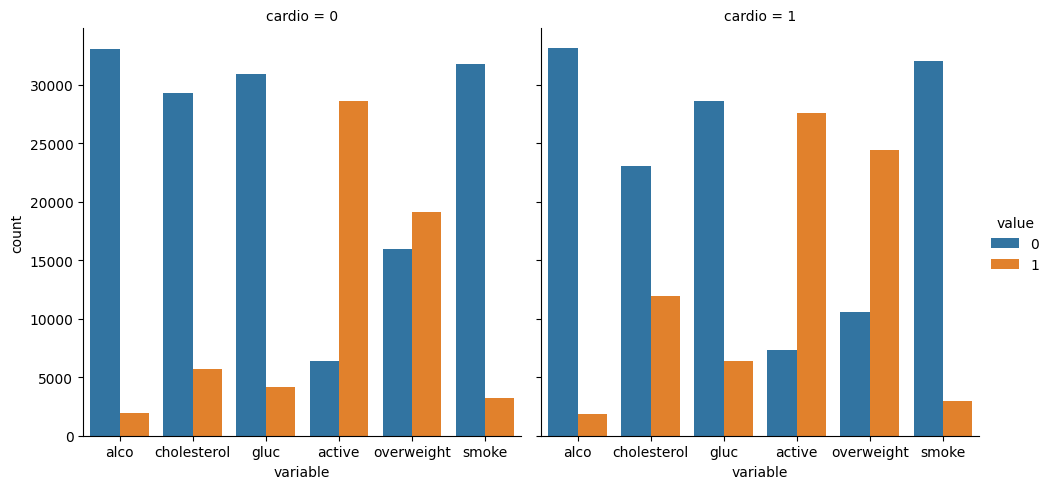

In [69]:
# plot the chart 
# based on the chart the column that we must take it is cardio and the cardio column have two values
# 1 and 0 so we made unpivot table that will take set of columns in one column named variable
# then for all column have values in column named value
# لذلك عندما نقوم بالرسم سيتم عمل رسمتين واحدة عندما تكون قيمة ال cardio = 0
# and another one for cardio = 1
# sns.catplot(x='alco', col="cardio", kind='count', data=df) # هذا المثال يوضح الفكرة بالطريقة السليمة
# as we when say : when the cardio column equal to 0 see how will be the alco column when be equal to zero or equal to one
# and the same for other variables

sns.catplot(x='variable', col="cardio", hue='value', kind='count', data=melt_data)


##### Clean the data. Filter out the following patient segments that represent incorrect data:
##### diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
##### height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
##### height is more than the 97.5th percentile
##### weight is less than the 2.5th percentile
##### weight is more than the 97.5th percentile
##### Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap(). Mask the upper triangle. The chart should look like examples/Figure_2.png. Any time a variable is set to None, make sure to set it to the correct code.

In [101]:
new_df = df[(df['ap_lo'] <= df['ap_hi']) & (df['height'] >= df['height'].quantile(0.025)) &
           (df['height'] <= df['height'].quantile(0.975)) &
           (df['weight'] >= df['weight'].quantile(0.025)) & 
           (df['weight'] <= df['weight'].quantile(0.975))]


In [102]:
new_df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,1,1,0,0,1,1,0
69994,99992,21074,1,165,80.0,150,80,1,1,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1


In [103]:
corr = new_df.corr()
corr

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,0.005581,0.002242,-0.002732,-0.000708,0.005891,0.003900,-0.000679
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.154642,0.097646,-0.044371,-0.026970,-0.011445,0.240241,0.089573
sex,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.038756,-0.023419,0.337436,0.168637,0.007864,0.002320,-0.052930
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.065980,-0.028364,0.187830,0.089785,-0.005661,-0.024102,-0.149570
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.137705,0.094133,0.056533,0.059917,-0.014430,0.170042,0.655926
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,0.021499,0.010226,-0.001928,0.000769,-0.000222,0.050556,0.017327
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,0.154348,0.067048,0.023275,0.033042,0.001569,0.327181,0.172212
cholesterol,0.005581,0.154642,-0.038756,-0.065980,0.137705,0.021499,0.154348,1.000000,0.451388,0.005696,0.031050,0.007381,0.219090,0.124846
gluc,0.002242,0.097646,-0.023419,-0.028364,0.094133,0.010226,0.067048,0.451388,1.000000,-0.010225,0.005805,-0.007709,0.087621,0.076303
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.005696,-0.010225,1.000000,0.341200,0.026940,-0.020345,-0.003274


In [104]:
# make the mask
mask = np.triu(corr)

In [105]:
mask

array([[ 1.00000000e+00,  2.50729691e-03,  3.42610273e-03,
         3.25916709e-04,  1.49333224e-04,  3.49238023e-03,
         4.83670793e-04,  5.58149323e-03,  2.24173738e-03,
        -2.73227725e-03, -7.08059804e-04,  5.89114223e-03,
         3.90011059e-03, -6.79420314e-04],
       [ 0.00000000e+00,  1.00000000e+00, -1.81320052e-02,
        -7.69318347e-02,  7.01683896e-02,  1.86894095e-02,
         1.53507973e-01,  1.54641591e-01,  9.76459261e-02,
        -4.43706471e-02, -2.69695382e-02, -1.14451266e-02,
         2.40241089e-01,  8.95726547e-02],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         5.05784851e-01,  1.29979320e-01,  5.06250408e-03,
         5.99466484e-02, -3.87555256e-02, -2.34194619e-02,
         3.37435881e-01,  1.68637124e-01,  7.86370242e-03,
         2.31999158e-03, -5.29296848e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  2.51502865e-01,  4.58573625e-03,
         1.79224331e-02, -6.59804014e-02, -2.

<AxesSubplot:>

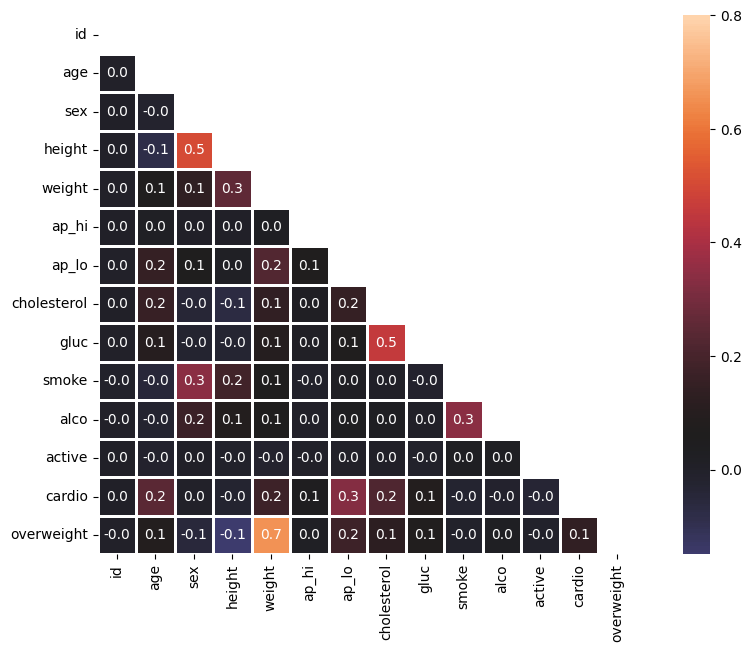

In [135]:
# fmt='.1f' >> format
# data >> corr
# mask >> mask like mask the upper triangle
# annot=True >> annotation : we can put the values of each square
# square = True >> make the each one as a square not rectangle
# linewidth=1 >> how many the width of each square we want
# vmax=.8  >> to play with colors
# center=0.09 help us to change the color of heatmap with the color bar

plt.subplots(figsize=(12, 7))
sns.heatmap(corr, mask=mask, annot=True, linewidth=1, center=0.09, vmax=0.8, square=True, fmt='.1f')

In [ ]:
# Finished...